In [425]:
import numpy as np
import matplotlib.pyplot as plt
from  scipy.integrate import solve_ivp

In [426]:
def thomas_attractor(t, xyz, b=0.19):
    ''' ODE for Thomas attractor
        xyz: point positions, shape (dim, nbr points)
    '''
    
    sin_xyz = np.sin(xyz)
    dYdt = -b*np.copy(xyz)
    dYdt[0, :] += sin_xyz[1, :]
    dYdt[1, :] += sin_xyz[2, :]
    dYdt[2, :] += sin_xyz[0, :]
    return dYdt

def thomas_attractor_jac(t, xyz, b=0.19):
    ''' ODE for Thomas attractor
        xyz: point positions, shape (dim, nbr points)
    '''
    
    cos_xyz = np.cos(xyz)
    jac = np.diag([-b]*3)
    jac[0, 2] = cos_xyz[0]
    jac[1, 0] = cos_xyz[1]
    jac[2, 1] = cos_xyz[2]
    return jac.T

In [427]:
thomas_attractor_jac(0, [2, 2, 1])[0, 2]

0.0

#(fun, t_span, y0, method='RK45', t_eval=None, dense_output=False, events=None, vectorized=False, **options)

In [428]:
methods = ['RK45', 'RK23', 'Radau', 'BDF', 'LSODA']
methods = ['RK23', 'BDF']

In [429]:
# Init
t_end = 1000
y0 = [2, 2, 1]
y0 = np.random.randn(3)*3

In [430]:
#y0 = np.array([-4.05624964, -0.43648031,  2.3846049 ])

In [431]:
# Solve
all_sol = {}
for method in methods:
    all_sol[method] = solve_ivp(thomas_attractor, (0, t_end), y0,
                                method=method, vectorized=True,
                                jac=thomas_attractor_jac, rtol=1e-6, atol=1e-4,
                                first_step=.1)
    

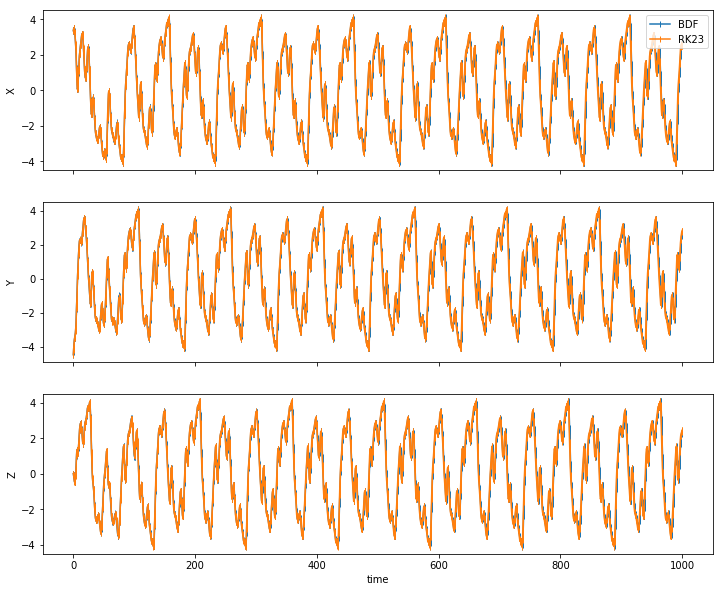

In [432]:
# Graph
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True,
                                    figsize=(12, 10))
for method, sol in all_sol.items():
    ax1.plot(sol.t, sol.y[0, :], '-|', label=method);
    ax2.plot(sol.t, sol.y[1, :], '-|', label=method);
    ax3.plot(sol.t, sol.y[2, :], '-|', label=method);
    ax1.set_ylabel('X');
    ax2.set_ylabel('Y');
    ax3.set_ylabel('Z');
    
ax1.legend(); ax3.set_xlabel('time');

## Stability of one starting point

In [435]:
# Burn
y0 = np.random.randn(3)*3
t_end = 100
sol = solve_ivp(thomas_attractor, (0, t_end), y0,
                method='RK23', vectorized=True,
                jac=thomas_attractor_jac, rtol=1e-4, atol=1e-3,
                first_step=.5)
y0 = sol.y[:, -1]

In [434]:
y0 = np.array([-2.33745353, -2.81678546, -2.67070758])

In [436]:
rho = 1e-2
all_y0 = [y0, ]
for _ in range(10):
    all_y0.append( y0 + (np.random.rand(3) - .5)*rho )

In [406]:
#y0 = np.array([-4.05624964, -0.43648031,  2.3846049 ])

In [437]:
method = 'RK23'
t_end = 200
all_sol = []
for y0 in all_y0:
    sol = solve_ivp(thomas_attractor, (0, t_end), y0,
                                method=method, vectorized=True,
                                jac=thomas_attractor_jac, rtol=1e-6, atol=1e-4,
                                first_step=.1)
    all_sol.append(sol)

In [408]:
#points = np.stack([sol.y for sol in all_sol], axis=2)

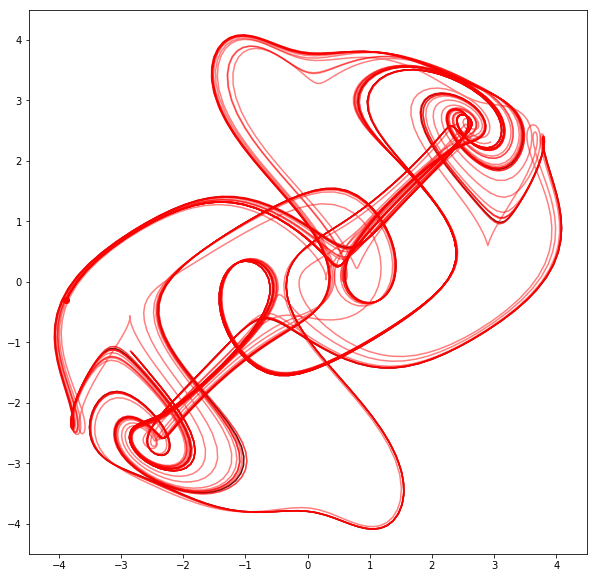

In [438]:
plt.figure(figsize=(10, 10))
plt.plot(y0[0], y0[1], 'ro')
plt.plot(all_sol[0].y[0, :], all_sol[0].y[1, :], 'k', alpha=.9);

for sol in all_sol[1:]:
    plt.plot(sol.y[0, :], sol.y[1, :], 'r', alpha=.5)
    


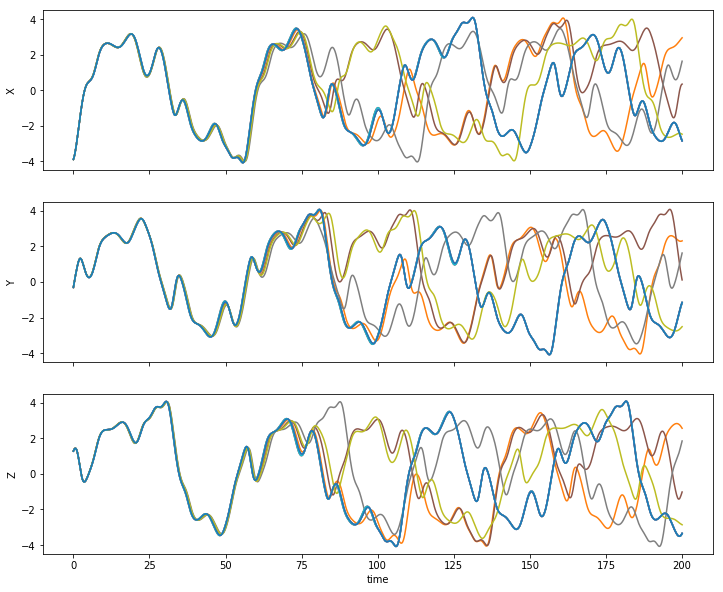

In [439]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True,
                                    figsize=(12, 10))
name = 'method'
for sol in all_sol:
    ax1.plot(sol.t, sol.y[0, :], '-', label=name);
    ax2.plot(sol.t, sol.y[1, :], '-', label=name);
    ax3.plot(sol.t, sol.y[2, :], '-', label=name);
    ax1.set_ylabel('X');
    ax2.set_ylabel('Y');
    ax3.set_ylabel('Z');
    
#ax1.legend();
ax3.set_xlabel('time');

## What are the limit cycles ?

In [443]:
def burn():
    y0 = np.random.randn(3)*3
    t_end = 500
    sol = solve_ivp(thomas_attractor, (0, t_end), y0,
                    method='RK23', vectorized=True,
                    jac=thomas_attractor_jac, rtol=1e-4, atol=1e-3,
                    first_step=.5)
    y0 = sol.y[:, -1]
    return y0

In [444]:
all_y0 = [burn() for _ in range(10)]

In [447]:
method = 'RK23'
t_end = 300
all_sol = []
for y0 in all_y0:
    sol = solve_ivp(thomas_attractor, (0, t_end), y0,
                                method=method, vectorized=True,
                                jac=thomas_attractor_jac, rtol=1e-6, atol=1e-4,
                                first_step=.1)
    all_sol.append(sol)

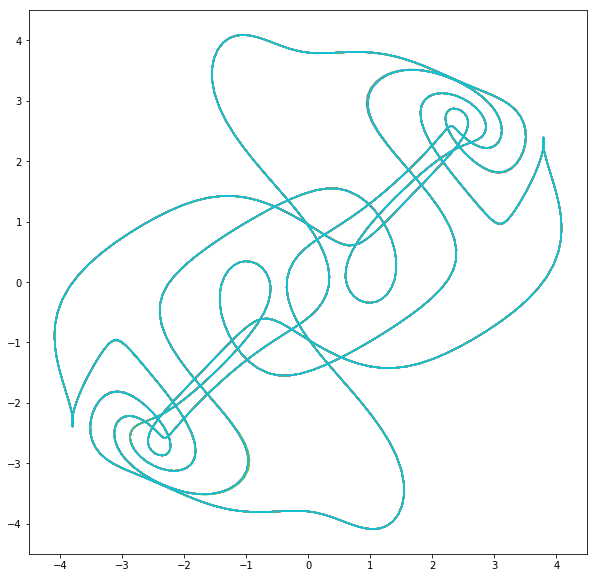

In [448]:
plt.figure(figsize=(10, 10))

for sol in all_sol:
    plt.plot(sol.y[0, :], sol.y[1, :])
    

In [398]:
all_y0

[array([-2.5811101 , -2.64771344, -2.31485771]),
 array([-3.12354313, -2.47373645, -2.1917469 ]),
 array([ 2.40428613, -1.09196562, -1.16523234]),
 array([3.47734628, 2.19111079, 1.96473436]),
 array([-3.33051385, -1.17738789, -2.41527056]),
 array([-2.04691467, -1.31675656, -3.75315628]),
 array([-1.87202157, -2.51075604, -3.26698653]),
 array([-1.36961333, -1.1166592 , -1.08186858]),
 array([-1.31328391, -3.44174765, -2.7053965 ]),
 array([-2.29933901, -0.87990514, -3.8052643 ])]

In [452]:
ds = np.sqrt(np.sum(np.diff(sol.y, axis=1)**2, axis=0))
print(ds.mean(), ds.std())

0.19769501244105483 0.054614228746717085


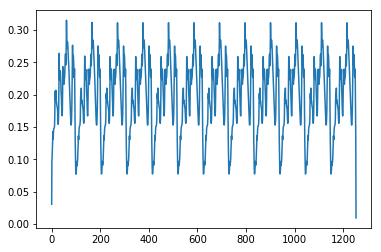

In [453]:
plt.plot(ds)

In [454]:
8/1000

0.008

In [455]:
# Detect cycle using events

In [461]:
#def event(t, y)
y0 = np.array([0, 1, 0])
v_y0 = thomas_attractor(0, y0[:, np.newaxis])
v_y0 /= np.sqrt(np.sum(v_y0**2))

y = np.array([1, 1, 1])

np.dot(y-y0, v_y0)

array([0.97544339])

In [462]:
v_y0

array([[ 0.97544339],
       [-0.22025031],
       [ 0.        ]])